In [24]:
import scipy.io as scio
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings("ignore")

In [25]:
path = 'mnist.mat'
data = scio.loadmat(path)

In [26]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [4]:
x_data = data['X']
y_data = data['y']

In [5]:
y_data[y_data==10] = 0

In [6]:
np.shape(x_data)

(5000, 400)

In [7]:
x_data[0,:]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

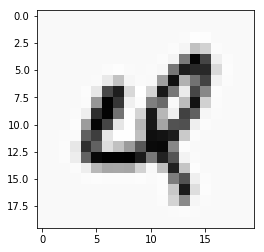

In [8]:
plt.imshow(x_data[1000,:].reshape(20,20),cmap = 'Greys')

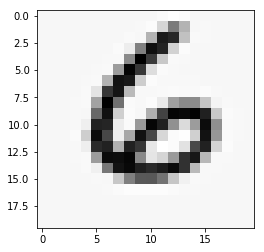

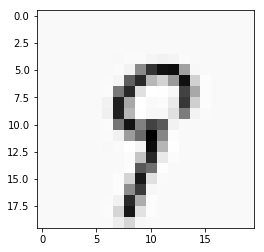

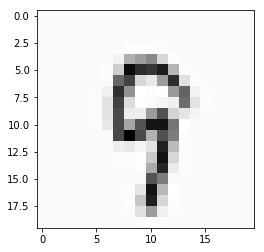

In [9]:
for i in range(1,4):
    image_array = random.choice(x_data).reshape(20,20).T
    plt.imshow(image_array, cmap = 'Greys', interpolation = 'None')
    plt.show()

In [10]:
r = pd.DataFrame(x_data)
r['label'] = y_data

In [11]:
def splitDataset(x,y):
    result = pd.DataFrame(x)
    result['label'] = y
    result = shuffle(result)
    training_set = result[:3500]
    cv_set = result[3500:4500]
    test_set = result[4500:]
    return training_set,cv_set,test_set

In [12]:
training_set,cv_set,test_set = splitDataset(x_data,y_data)

In [13]:
training_set.shape

(3500, 401)

In [14]:
cv_set.shape

(1000, 401)

In [15]:
test_set.shape

(500, 401)

In [16]:
x_train = training_set.drop("label",axis = 1)
y_train = training_set['label']

In [17]:
x_cv = cv_set.drop("label",axis = 1)
y_cv = cv_set['label']

In [18]:
x_test = test_set.drop("label",axis = 1)
y_test = test_set['label']

In [19]:
def LR_fit(x,y,c = 1):
    clf = LogisticRegression(C = c)
    clf.fit(x,y)
    return clf

In [20]:
model = LR_fit(x_train,y_train)

In [21]:
def compute_error_lr(model,x,y):
    acc = model.score(x,y)
    error = 1 - acc
    return error

In [22]:
error1 = compute_error_lr(model,x_train,y_train)
print('训练集分类误差：',error1)

训练集分类误差： 0.04971428571428571


In [23]:
error2 = compute_error_lr(model,x_cv,y_cv)
print('验证集集分类误差：',error2)

验证集集分类误差： 0.09899999999999998


In [ ]:
#测试集
error3 = compute_error_lr(model,x_test,y_test)
print('测试集分类误差：',error3)

In [ ]:
lambda1 = np.linspace(0,8, num=21)
Cs = [1 if l == 0 else 1/l for l in lambda1]

In [ ]:
lambda1

In [ ]:
Cs

In [ ]:
train_scores = []
cv_scores = []
test_scores = []

for C in list(lambda1[1:]):
    model1 = LR_fit(x_train,y_train,c = C)
    error1 = compute_error_lr(model1,x_train,y_train)
    error2 = compute_error_lr(model1,x_cv,y_cv)
    error3 = compute_error_lr(model1,x_test,y_test)
    train_scores.append(error1)
    cv_scores.append(error2)
    test_scores.append(error3)

In [ ]:
plt.plot(list(lambda1[1:]),train_scores,label = 'train')
plt.plot(list(lambda1[1:]),cv_scores,label = 'cv')
plt.plot(list(lambda1[1:]),test_scores,label = 'test')
plt.legend()
plt.ylabel('error')
plt.show()

由于训练集错误率下降，但是验证集和测试集的错误率都上升，所以折中lambda选择为2

In [ ]:
train_scores = []
cv_scores = []
test_scores = []

for i in range(100,3600,100):
    now_x = x_train[:i]
    now_y = y_train[:i]
    model1 = LR_fit(now_x,now_y,c = 2)
    error1 = compute_error_lr(model1,now_x,now_y)
    error2 = compute_error_lr(model1,x_cv,y_cv)
    error3 = compute_error_lr(model1,x_test,y_test)
    train_scores.append(error1)
    cv_scores.append(error2)
    test_scores.append(error3)

In [ ]:
plt.plot(list(range(100,3600,100)),train_scores,label = 'train')
plt.plot(list(range(100,3600,100)),cv_scores,label = 'val')
plt.plot(list(range(100,3600,100)),test_scores,label = 'test')
plt.legend()
plt.ylabel('error')
plt.show()